In [1]:
# Objective of this analysis is to gain insight into current home price trends in the midwest (Minnesota, Wisconsin, Illinois,
# Indiana and Michigan, then to forecast prices in 2026 -2027.

#Lines 2-19 are Data Wrangling.
#Lines 20 - 37 are EDA
#Lines 38 - 39 are data preprocessing and training data development
#Lines 40 - 57 are Data Modelling.
#Line 58 contains a brief summary of our findings

In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing data here. Sources are Zillow.com for df, and the St. Louis FED for nw.

data=pd.read_csv('Zillow2.csv')
df=pd.DataFrame(data)

nationwide = pd.read_csv('MSPUS.csv')
nw = pd.DataFrame(nationwide)

In [5]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
0,102001,0,United States,country,NaN,122360.594766,122569.323778,122828.304306,123384.505512,124024.722423,...,345946.961379,347722.525260,349334.782135,350526.042971,351416.736899,3.520623e+05,3.525343e+05,3.529859e+05,3.538174e+05,3.553902e+05
1,394913,1,"New York, NY",msa,NY,215999.952670,216912.906348,217831.008010,219687.897686,221601.009765,...,632172.106832,635932.304226,639426.067256,642402.287575,645191.272424,6.480191e+05,6.512934e+05,6.544591e+05,6.587701e+05,6.644333e+05
2,753899,2,"Los Angeles, CA",msa,CA,241545.913605,242467.737384,243667.759329,246059.346751,248654.855362,...,942739.330392,955522.107200,970848.856593,986168.993114,998903.022125,1.008447e+06,1.014526e+06,1.014610e+06,1.011261e+06,1.010073e+06
3,394463,3,"Chicago, IL",msa,IL,156914.544255,157066.890879,157347.438910,158045.302774,158879.278809,...,313945.202268,316600.030030,319076.964256,320834.927710,322142.378845,3.230734e+05,3.238310e+05,3.246622e+05,3.262751e+05,3.289376e+05
4,394514,4,"Dallas, TX",msa,TX,128760.424416,128817.372894,128887.645797,129065.848992,129295.345081,...,377251.486408,378247.287421,379172.670082,379568.769298,379658.719912,3.795078e+05,3.791829e+05,3.792118e+05,3.797052e+05,3.808843e+05


In [6]:
df = df[df['StateName'].isin(['MN', 'WI', 'IN', 'MI', 'IL'])]
df = df.drop(df.index[0])

In [7]:
df.shape

(136, 296)

In [8]:
df.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
Length: 296, dtype: int64

In [9]:
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
816,394649,850,"Greensburg, IN",msa,IN,NaN,NaN,NaN,NaN,NaN,...,218099.724450,219706.583467,221064.589053,222065.211696,222314.544523,221938.272301,221692.978060,222402.668834,223753.056945,225612.459479
820,394912,855,"New Ulm, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,205044.019634,205562.258855,206009.910874,206668.999959,207362.050362,208195.805833,208634.473287,209231.765511,210048.916728,211699.746826
825,394830,860,"Marshall, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,204356.205571,203355.969919,202774.375402,202401.841207,201662.707025,201079.537404,200023.596833,199711.759704,200043.230349,201604.145414
840,394494,877,"Connersville, IN",msa,IN,NaN,NaN,NaN,NaN,NaN,...,136176.103206,136454.500595,136970.233111,137311.312765,137775.349175,137833.084236,138164.478492,138922.417578,140241.757286,141950.550557
849,395239,885,"Worthington, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,213027.565050,211561.517611,209202.937613,207745.977429,205897.870523,204560.676632,203069.926409,203015.119395,204280.276543,206787.344804


In [10]:
# Given that this dataset is a time-series dataset of home prices, I will fill NA values with 0. A mean or median fill of 
# 22 years of pricing data would not make sense
df.fillna(0, inplace=True)

In [11]:
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
816,394649,850,"Greensburg, IN",msa,IN,0.0,0.0,0.0,0.0,0.0,...,218099.724450,219706.583467,221064.589053,222065.211696,222314.544523,221938.272301,221692.978060,222402.668834,223753.056945,225612.459479
820,394912,855,"New Ulm, MN",msa,MN,0.0,0.0,0.0,0.0,0.0,...,205044.019634,205562.258855,206009.910874,206668.999959,207362.050362,208195.805833,208634.473287,209231.765511,210048.916728,211699.746826
825,394830,860,"Marshall, MN",msa,MN,0.0,0.0,0.0,0.0,0.0,...,204356.205571,203355.969919,202774.375402,202401.841207,201662.707025,201079.537404,200023.596833,199711.759704,200043.230349,201604.145414
840,394494,877,"Connersville, IN",msa,IN,0.0,0.0,0.0,0.0,0.0,...,136176.103206,136454.500595,136970.233111,137311.312765,137775.349175,137833.084236,138164.478492,138922.417578,140241.757286,141950.550557
849,395239,885,"Worthington, MN",msa,MN,0.0,0.0,0.0,0.0,0.0,...,213027.565050,211561.517611,209202.937613,207745.977429,205897.870523,204560.676632,203069.926409,203015.119395,204280.276543,206787.344804


In [12]:
nw.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [13]:
nw.tail()

,DATE,MSPUS
240,2023-01-01,429000.0
241,2023-04-01,418500.0
242,2023-07-01,435400.0
243,2023-10-01,423200.0
244,2024-01-01,420800.0


In [14]:
nw.dtypes

DATE      object
MSPUS    float64
dtype: object

In [15]:
nw['DATE'] = pd.to_datetime(nw['DATE'])

In [16]:
nw.rename(columns={'DATE' : 'date', 'MSPUS' : 'Avg price'}, inplace=True)

In [17]:
df['RegionID'].nunique()

136

In [18]:
nw=nw[147:243]

In [19]:
nw.head()

,date,Avg price
147,1999-10-01,165300.0
148,2000-01-01,165300.0
149,2000-04-01,163200.0
150,2000-07-01,168800.0
151,2000-10-01,172900.0


In [20]:
# All null values have been set to zero, and all Region IDs are unique. Nationwide dataset has had date set to datetime data.
# Nationwide average data has been cut to reflect roughly the time period that Zillow's data covers, and is clean.

In [21]:
## Here begins step 3 - Exploratory Data Analysis

In [22]:
columns_to_drop = ['RegionID', 'SizeRank', 'RegionType', 'RegionName']
dfnum = df.drop(columns=columns_to_drop)

In [23]:
dfnum.head()

,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
14,MI,122786.524149,122916.105959,123250.994159,123926.511611,124816.575283,125791.291781,126913.004891,128021.062674,129008.384154,...,237484.205956,239136.596350,240600.978147,241693.860089,242665.420998,243396.060216,243979.452494,244547.651893,245706.285123,247627.536546
16,MN,150126.225617,150618.623497,151057.359575,152109.347510,153271.599544,154657.440068,156193.241444,158348.434442,160545.323957,...,378683.810734,380316.187830,381598.816029,382234.804582,382161.380115,381710.162124,381116.270688,380733.506619,381021.509967,382267.446238
33,IN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,274951.515331,275904.134437,276753.562241,277304.231368,277627.764708,277648.617047,277546.522431,277922.915950,278827.375243,280482.527809
40,WI,146402.709470,146467.610007,146692.519573,146988.346949,147367.389859,147726.669682,148256.198500,148982.362648,149782.972135,...,336725.763322,338898.121857,341011.454322,342632.416850,343910.194366,344638.748760,345045.310152,345469.474893,346866.667353,349900.512797
52,MI,121493.709788,121498.838534,121633.124604,121890.963574,122357.276972,122965.421117,123566.025099,124229.252595,124814.010247,...,309147.512297,310433.372574,311548.693579,312632.074136,313626.220402,314324.667121,314950.779410,315819.087651,317335.198678,319844.501285


In [24]:
dfnum['StateName'].nunique()

5

In [25]:
grouped = dfnum.groupby('StateName')

dfs = []
for state, group in grouped:
    avg_prices = group.iloc[:, 1:].mean(axis=0) 
    state_df = pd.DataFrame({state: avg_prices.values})
    dfs.append(state_df)

avg_df = pd.concat(dfs, axis=1)
avg_df.insert(0, 'Time Period', dfnum.columns[1:])

print(avg_df.head())

  Time Period            IL            IN            MI            MN  \
0  2000-01-31  18186.296095  11403.361014  74860.030508  16494.422806   
1  2000-02-29  18198.348318  11407.682680  74854.881713  16546.499973   
2  2000-03-31  18224.857991  13629.344609  74944.123560  16603.187218   
3  2000-04-30  18292.265177  13663.781918  75146.584741  16737.850931   
4  2000-05-31  18364.326075  13705.865169  75504.363841  16881.151412   

             WI  
0  20490.552537  
1  20495.504582  
2  20520.714073  
3  20550.593740  
4  20619.628690  


In [26]:
avg_df

,Time Period,IL,IN,MI,MN,WI
0,2000-01-31,18186.296095,11403.361014,74860.030508,16494.422806,20490.552537
1,2000-02-29,18198.348318,11407.682680,74854.881713,16546.499973,20495.504582
2,2000-03-31,18224.857991,13629.344609,74944.123560,16603.187218,20520.714073
3,2000-04-30,18292.265177,13663.781918,75146.584741,16737.850931,20550.593740
4,2000-05-31,18364.326075,13705.865169,75504.363841,16881.151412,20619.628690
...,...,...,...,...,...,...
286,2023-11-30,142335.612730,201732.874915,213700.650460,267889.661932,272879.359756
287,2023-12-31,142774.749784,201662.742157,213745.122756,267742.510283,272604.256537
288,2024-01-31,142918.527027,202000.085122,213908.144134,267739.817090,272761.246515
289,2024-02-29,143445.835711,202974.959736,214592.054285,268265.931471,273912.168152


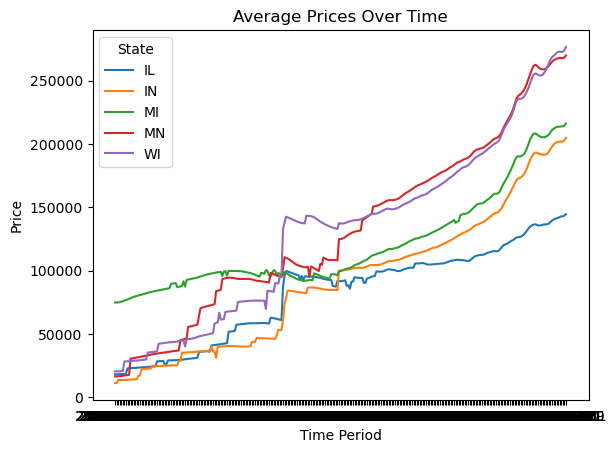

In [27]:
for state in avg_df.columns[1:6]: 
    sns.lineplot(data=avg_df, x='Time Period', y=state, label=state)

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Average Prices Over Time')
plt.legend(title='State')

plt.show()

In [28]:
# Now we will explore the variation of prices within each state

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\3107974451.py:4: UserWarning: 
The palette list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfnum[dfnum['StateName'] == 'MN'].drop(columns='StateName').T, label='Individual Prices (MN)', color=palette[1], palette=[palette[1]], legend=False)


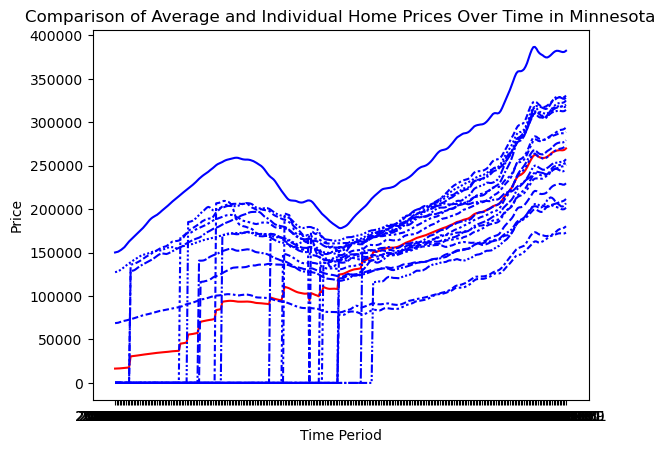

In [29]:
palette = ['red', 'blue']

sns.lineplot(data=avg_df, x='Time Period', y='MN', label='Average', color=palette[0], legend=False)
sns.lineplot(data=dfnum[dfnum['StateName'] == 'MN'].drop(columns='StateName').T, label='Individual Prices (MN)', color=palette[1], palette=[palette[1]], legend=False)

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Comparison of Average and Individual Home Prices Over Time in Minnesota')

plt.show()

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\184491212.py:4: UserWarning: 
The palette list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfnum[dfnum['StateName'] == 'WI'].drop(columns='StateName').T, label='Individual Prices (WI)', color=palette[1], palette=[palette[1]], legend=False)


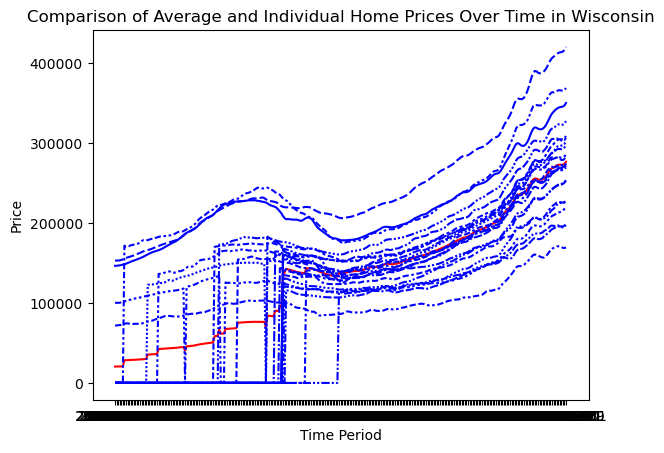

In [30]:
palette = ['red', 'blue']

sns.lineplot(data=avg_df, x='Time Period', y='WI', label='Average', color=palette[0], legend=False)
sns.lineplot(data=dfnum[dfnum['StateName'] == 'WI'].drop(columns='StateName').T, label='Individual Prices (WI)', color=palette[1], palette=[palette[1]], legend=False)

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Comparison of Average and Individual Home Prices Over Time in Wisconsin')

plt.show()

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\2089621442.py:8: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfnum[dfnum['StateName'] == 'IN'].drop(columns='StateName').T, label='Individual Prices (IN)', color=palette[1], palette=[palette[1]], legend=False)


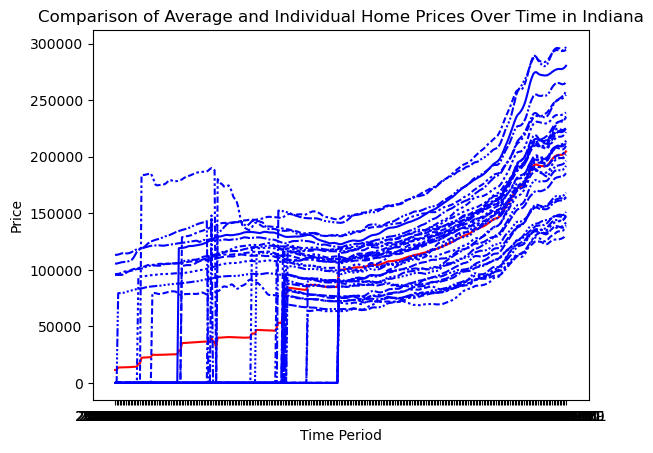

In [31]:
# Define the color palette
palette = ['red', 'blue']

# Plot average home price for Minnesota from avg_df
sns.lineplot(data=avg_df, x='Time Period', y='IN', label='Average', color=palette[0], legend=False)

# Plot individual home prices for Minnesota from dfnum
sns.lineplot(data=dfnum[dfnum['StateName'] == 'IN'].drop(columns='StateName').T, label='Individual Prices (IN)', color=palette[1], palette=[palette[1]], legend=False)

# Set labels, title
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Comparison of Average and Individual Home Prices Over Time in Indiana')

plt.show()

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\3133524034.py:4: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfnum[dfnum['StateName'] == 'IL'].drop(columns='StateName').T, label='Individual Prices (IL)', color=palette[1], palette=[palette[1]], legend=False)


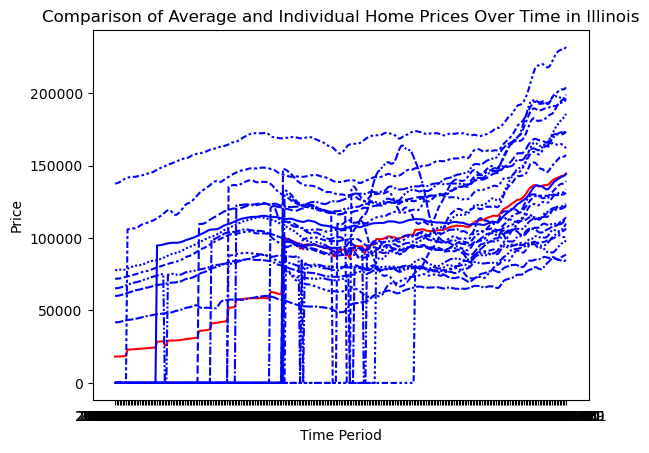

In [32]:
palette = ['red', 'blue']

sns.lineplot(data=avg_df, x='Time Period', y='IL', label='Average', color=palette[0], legend=False)
sns.lineplot(data=dfnum[dfnum['StateName'] == 'IL'].drop(columns='StateName').T, label='Individual Prices (IL)', color=palette[1], palette=[palette[1]], legend=False)

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Comparison of Average and Individual Home Prices Over Time in Illinois')

plt.show()

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\863489373.py:4: UserWarning: 
The palette list has fewer values (1) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfnum[dfnum['StateName'] == 'MI'].drop(columns='StateName').T, label='Individual Prices (MI)', color=palette[1], palette=[palette[1]], legend=False)


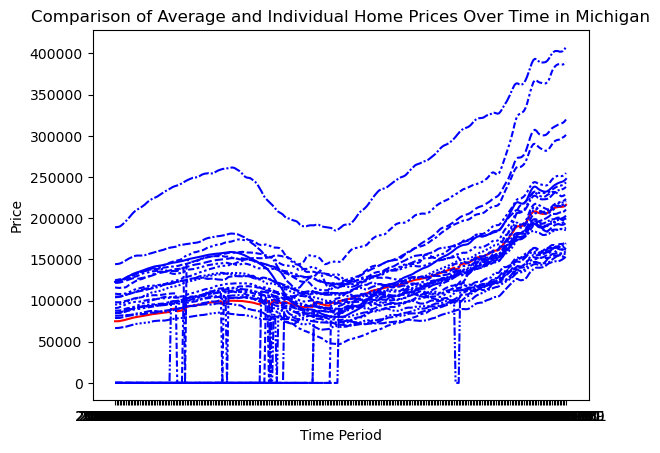

In [33]:
palette = ['red', 'blue']

sns.lineplot(data=avg_df, x='Time Period', y='MI', label='Average', color=palette[0], legend=False)
sns.lineplot(data=dfnum[dfnum['StateName'] == 'MI'].drop(columns='StateName').T, label='Individual Prices (MI)', color=palette[1], palette=[palette[1]], legend=False)

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Comparison of Average and Individual Home Prices Over Time in Michigan')

plt.show()

In [34]:
# Over these five graphs, we see something surprising: Illinois has the lowest average housing price among all states considered, 
# with Minnesota and Wisconsin vying for the highest. To further explore this, let's look at how many houses in each state are in
# major metro areas (Minneapolis/St. Paul, Milwaukee, Indianapolis, Chicago, Detroit, Ft. Wayne), compared to how many are further 
# from their respective population centers.

In [35]:
columns_to_drop = ['RegionID', 'SizeRank', 'RegionType']
dfcity = df.drop(columns=columns_to_drop)

In [36]:
dfcity.head()

,RegionName,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
14,"Detroit, MI",MI,122786.524149,122916.105959,123250.994159,123926.511611,124816.575283,125791.291781,126913.004891,128021.062674,...,237484.205956,239136.596350,240600.978147,241693.860089,242665.420998,243396.060216,243979.452494,244547.651893,245706.285123,247627.536546
16,"Minneapolis, MN",MN,150126.225617,150618.623497,151057.359575,152109.347510,153271.599544,154657.440068,156193.241444,158348.434442,...,378683.810734,380316.187830,381598.816029,382234.804582,382161.380115,381710.162124,381116.270688,380733.506619,381021.509967,382267.446238
33,"Indianapolis, IN",IN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,274951.515331,275904.134437,276753.562241,277304.231368,277627.764708,277648.617047,277546.522431,277922.915950,278827.375243,280482.527809
40,"Milwaukee, WI",WI,146402.709470,146467.610007,146692.519573,146988.346949,147367.389859,147726.669682,148256.198500,148982.362648,...,336725.763322,338898.121857,341011.454322,342632.416850,343910.194366,344638.748760,345045.310152,345469.474893,346866.667353,349900.512797
52,"Grand Rapids, MI",MI,121493.709788,121498.838534,121633.124604,121890.963574,122357.276972,122965.421117,123566.025099,124229.252595,...,309147.512297,310433.372574,311548.693579,312632.074136,313626.220402,314324.667121,314950.779410,315819.087651,317335.198678,319844.501285


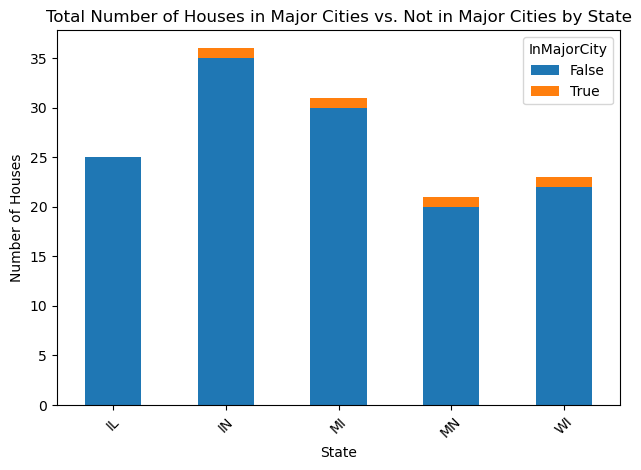

In [37]:
Metro = ['Minneapolis, MN', 'Milwaukee, WI', 'Indianapolis, IN', 'Chicago, IL', 'Detroit, MI', 'St. Paul, MN']

dfcity['InMajorCity'] = dfcity['RegionName'].isin(Metro)
houses_per_state = dfcity.groupby(['StateName', 'InMajorCity']).size().unstack(fill_value=0)
houses_per_state.plot(kind='bar', stacked=True)

plt.xlabel('State')
plt.ylabel('Number of Houses')
plt.title('Total Number of Houses in Major Cities vs. Not in Major Cities by State')

plt.xticks(rotation=45)
plt.tight_layout() 

plt.show()

In [38]:
# Interestingly, although Chicago does not account for any listings in this data, different states still do not seem to have
# enough listings in metro areas to throw off the analysis enough to account for the difference in average prices between
# Illinois and the other states. Looking at this data, we seem to be noticing that both trends and price points seem to differ
# state by state.

In [39]:
# Here begins the data preprocessing

In [40]:
# There is no need for preprocessing prior to model training for the following reasons:
# There is no categorical data we will be analyzing. The only categorical data are state names, which will only be used for labeling
# There is no need for scaling, as all data are home prices through time, none of which represent differences in scale
# There is no need for dummies, due to the nature of data
# These things considered, the data is ready for modeling

In [41]:
# Here begins the Modeling process

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from prophet import Prophet

In [43]:
# I will model each state's forecast separately before comparing the separate forecasts
# We will need to add future dates through the end of 2027 in order to predict future values

In [44]:
#First we separate the states from dfnum into their respective states, and we prep the data format for modelling
states = ['MN', 'IN', 'IL', 'WI', 'MI']
state_dfs = {state: dfnum[dfnum['StateName'] == state].drop(columns=['StateName']) for state in states}
def prepare_data(state_df):
    state_df = state_df.T
    state_df.columns = state_df.iloc[0]
    state_df = state_df[1:]
    state_df.index.name = 'Date'
    state_df = state_df.reset_index()
    state_df['Date'] = pd.to_datetime(state_df['Date'])
    state_df = state_df.melt(id_vars='Date', var_name='Region', value_name='Value')
    return state_df.groupby('Date')['Value'].mean().reset_index()
state = 'MN'
state_df = prepare_data(state_dfs[state])

#Now that we have separated our states, we will separate out training and testing dates for model selection
train_end_date = '2021-03-31'
test_start_date = '2021-04-30'
train = state_df[state_df['Date'] <= train_end_date]
test = state_df[state_df['Date'] >= test_start_date]

train['Time'] = train['Date'].map(pd.Timestamp.toordinal)
test['Time'] = test['Date'].map(pd.Timestamp.toordinal)
X_train = train[['Time']]
y_train = train['Value']
X_test = test[['Time']]
y_test = test['Value']

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\2173788397.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Time'] = train['Date'].map(pd.Timestamp.toordinal)
C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\2173788397.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Time'] = test['Date'].map(pd.Timestamp.toordinal)


00:34:30 - cmdstanpy - INFO - Chain [1] start processing
00:34:30 - cmdstanpy - INFO - Chain [1] done processing


Linear Regression MSE: 944302385.6405778
Random Forest Regressor MSE: 1342337242.3797417
Decision Tree Regressor MSE: 1255531559.248402
Prophet MSE: 76557561.82775001


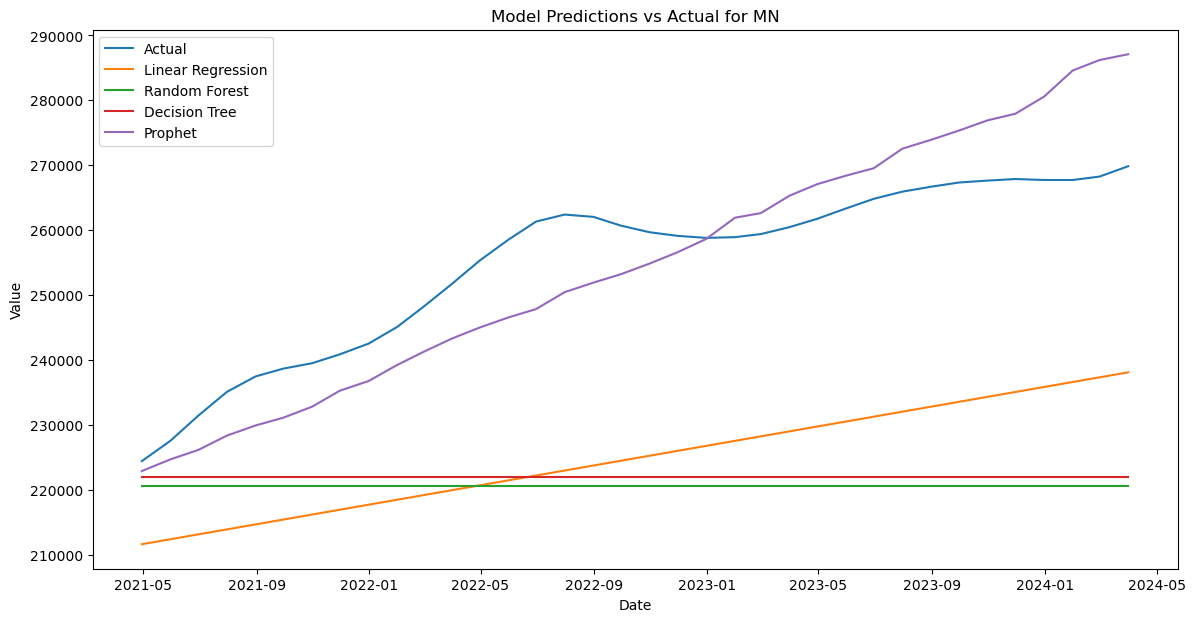

In [50]:
# Now we will test the models against one another, using Mean Squared Error as our metric
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)

#After testing, we find that while prophet by itself underperforms the Linear Regression model, with a bit of tuning it becomes the best
#Model by a fair margin
prophet_train = train[['Date', 'Value']].rename(columns={'Date': 'ds', 'Value': 'y'})
prophet_test = test[['Date', 'Value']].rename(columns={'Date': 'ds', 'Value': 'y'})
prophet_model = Prophet(
    growth='linear',
    changepoint_prior_scale=1.5,
    changepoint_range=1.0,
)

prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=len(test), freq='M')

forecast = prophet_model.predict(future)
prophet_test = forecast.set_index('ds').loc[test['Date'].min():test['Date'].max()]['yhat'].values
mse_prophet = mean_squared_error(y_test, prophet_test)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Random Forest Regressor MSE: {mse_rf}')
print(f'Decision Tree Regressor MSE: {mse_dt}')
print(f'Prophet MSE: {mse_prophet}')

# Comparing the results
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred_lr, label='Linear Regression')
plt.plot(test['Date'], y_pred_rf, label='Random Forest')
plt.plot(test['Date'], y_pred_dt, label='Decision Tree')
plt.plot(test['Date'], prophet_test, label='Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Model Predictions vs Actual for {state}')
plt.legend()
plt.show()

In [51]:
# With both tree-based models failing to produce more than one prediction, and with Prophet having both more relevant hyperparameters
# as well as a more robust time-series predictive capability, we will move forward with Prophet as the primary model for predictions.

#First, we will add dates between 2024-04-30 and 2027-12-31 to dfnum, and will rerun our code to predict their values with Prophet

future_dates = pd.date_range(start='2024-04-01', end='2027-12-31', freq='M')
for date in future_dates:
    column_name = date.strftime('%Y-%m-%d')  
    dfnum[column_name] = pd.Series([None] * len(dfnum))  

print(dfnum.head())

   StateName     2000-01-31     2000-02-29     2000-03-31     2000-04-30  \
14        MI  122786.524149  122916.105959  123250.994159  123926.511611   
16        MN  150126.225617  150618.623497  151057.359575  152109.347510   
33        IN       0.000000       0.000000       0.000000       0.000000   
40        WI  146402.709470  146467.610007  146692.519573  146988.346949   
52        MI  121493.709788  121498.838534  121633.124604  121890.963574   

       2000-05-31     2000-06-30     2000-07-31     2000-08-31     2000-09-30  \
14  124816.575283  125791.291781  126913.004891  128021.062674  129008.384154   
16  153271.599544  154657.440068  156193.241444  158348.434442  160545.323957   
33       0.000000       0.000000       0.000000       0.000000       0.000000   
40  147367.389859  147726.669682  148256.198500  148982.362648  149782.972135   
52  122357.276972  122965.421117  123566.025099  124229.252595  124814.010247   

    ...  2027-03-31  2027-04-30  2027-05-31  2027-06-30 

In [52]:
state_dfs = {state: dfnum[dfnum['StateName'] == state].drop(columns=['StateName']) for state in states}
def prepare_data(state_df):
    state_df = state_df.T
    state_df.columns = state_df.iloc[0]
    state_df = state_df[1:]
    state_df.index.name = 'Date'
    state_df = state_df.reset_index()
    state_df['Date'] = pd.to_datetime(state_df['Date'])
    state_df = state_df.melt(id_vars='Date', var_name='Region', value_name='Value')
    return state_df.groupby('Date')['Value'].mean().reset_index()
state = 'MN'
state_df = prepare_data(state_dfs[state])

#Now that we have separated our states, we will separate out training and testing dates for model selection
train_end_date = '2021-03-31'
test_start_date = '2021-04-30'
train = state_df[state_df['Date'] <= train_end_date]
test = state_df[state_df['Date'] >= test_start_date]

train['Time'] = train['Date'].map(pd.Timestamp.toordinal)
test['Time'] = test['Date'].map(pd.Timestamp.toordinal)
X_train = train[['Time']]
y_train = train['Value']
X_test = test[['Time']]
y_test = test['Value']

C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\315841064.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Time'] = train['Date'].map(pd.Timestamp.toordinal)
C:\Users\tnels\AppData\Local\Temp\ipykernel_33092\315841064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Time'] = test['Date'].map(pd.Timestamp.toordinal)


In [53]:
#Finally, time to make our predictions for each of the states. First we take the same steps we did when selecting a model
def prepare_data(state_df):
    state_df = state_df.T
    state_df.columns = state_df.iloc[0]
    state_df = state_df[1:]
    state_df.index.name = 'Date'
    state_df = state_df.reset_index()
    state_df['Date'] = pd.to_datetime(state_df['Date'])
    state_df = state_df.melt(id_vars='Date', var_name='Region', value_name='Value')
    return state_df.groupby('Date')['Value'].mean().reset_index()

states = ['MN', 'IN', 'IL', 'WI', 'MI']
state_dfs = {state: prepare_data(dfnum[dfnum['StateName'] == state].drop(columns=['StateName'])) for state in states}
def predict_future(state_df, state_name):
    print(f"Preparing to predict for {state_name}")
    print("Initial state_df.head():")
    print(state_df.head())
    
    state_df = state_df.rename(columns={'Date': 'ds', 'Value': 'y'})
    print("Renamed state_df.head():")
    print(state_df.head())
    
    # adding our hyperparameters for Prophet
    prophet_model = Prophet(
    growth='linear',
    changepoint_prior_scale=1.5,
    changepoint_range=1.0,
    )
    

    prophet_model.fit(state_df)
    future = prophet_model.make_future_dataframe(periods=44, freq='M')
    forecast = prophet_model.predict(future)

    future_predictions = forecast[['ds', 'yhat']].tail(44)
    future_predictions['StateName'] = state_name
    
    return future_predictions
#Storing our predictions in a new dataframe
predicted_df = pd.DataFrame()

for state in states:
    state_df = state_dfs[state]
    future_predictions = predict_future(state_df, state)
    predicted_df = pd.concat([predicted_df, future_predictions], ignore_index=True)

predicted_df.columns = ['Date', 'PredictedValue', 'StateName']
print(predicted_df.head())

00:34:38 - cmdstanpy - INFO - Chain [1] start processing


Preparing to predict for MN
Initial state_df.head():
        Date         Value
0 2000-02-29  16546.499973
1 2000-03-31  16603.187218
2 2000-04-30  16737.850931
3 2000-05-31  16881.151412
4 2000-06-30   17038.23516
Renamed state_df.head():
          ds             y
0 2000-02-29  16546.499973
1 2000-03-31  16603.187218
2 2000-04-30  16737.850931
3 2000-05-31  16881.151412
4 2000-06-30   17038.23516


00:34:38 - cmdstanpy - INFO - Chain [1] done processing
00:34:38 - cmdstanpy - INFO - Chain [1] start processing


Preparing to predict for IN
Initial state_df.head():
        Date         Value
0 2000-02-29   11407.68268
1 2000-03-31  13629.344609
2 2000-04-30  13663.781918
3 2000-05-31  13705.865169
4 2000-06-30  13750.055616
Renamed state_df.head():
          ds             y
0 2000-02-29   11407.68268
1 2000-03-31  13629.344609
2 2000-04-30  13663.781918
3 2000-05-31  13705.865169
4 2000-06-30  13750.055616


00:34:39 - cmdstanpy - INFO - Chain [1] done processing
00:34:39 - cmdstanpy - INFO - Chain [1] start processing


Preparing to predict for IL
Initial state_df.head():
        Date         Value
0 2000-02-29  18198.348318
1 2000-03-31  18224.857991
2 2000-04-30  18292.265177
3 2000-05-31  18364.326075
4 2000-06-30  18443.625082
Renamed state_df.head():
          ds             y
0 2000-02-29  18198.348318
1 2000-03-31  18224.857991
2 2000-04-30  18292.265177
3 2000-05-31  18364.326075
4 2000-06-30  18443.625082


00:34:39 - cmdstanpy - INFO - Chain [1] done processing
00:34:39 - cmdstanpy - INFO - Chain [1] start processing


Preparing to predict for WI
Initial state_df.head():
        Date         Value
0 2000-02-29  20495.504582
1 2000-03-31  20520.714073
2 2000-04-30   20550.59374
3 2000-05-31   20619.62869
4 2000-06-30   20710.68062
Renamed state_df.head():
          ds             y
0 2000-02-29  20495.504582
1 2000-03-31  20520.714073
2 2000-04-30   20550.59374
3 2000-05-31   20619.62869
4 2000-06-30   20710.68062


00:34:40 - cmdstanpy - INFO - Chain [1] done processing
00:34:40 - cmdstanpy - INFO - Chain [1] start processing


Preparing to predict for MI
Initial state_df.head():
        Date         Value
0 2000-02-29  74854.881713
1 2000-03-31   74944.12356
2 2000-04-30  75146.584741
3 2000-05-31  75504.363841
4 2000-06-30  75896.443278
Renamed state_df.head():
          ds             y
0 2000-02-29  74854.881713
1 2000-03-31   74944.12356
2 2000-04-30  75146.584741
3 2000-05-31  75504.363841
4 2000-06-30  75896.443278


00:34:40 - cmdstanpy - INFO - Chain [1] done processing


        Date  PredictedValue StateName
0 2024-04-30   270364.114604        MN
1 2024-05-31   271382.344417        MN
2 2024-06-30   271895.902209        MN
3 2024-07-31   272477.555088        MN
4 2024-08-31   272971.065006        MN


In [54]:
predicted_df.head()

,Date,PredictedValue,StateName
0,2024-04-30,270364.114604,MN
1,2024-05-31,271382.344417,MN
2,2024-06-30,271895.902209,MN
3,2024-07-31,272477.555088,MN
4,2024-08-31,272971.065006,MN


In [55]:
# Let's visualize our predictions, first by themselves before adding historical data to the predictions.

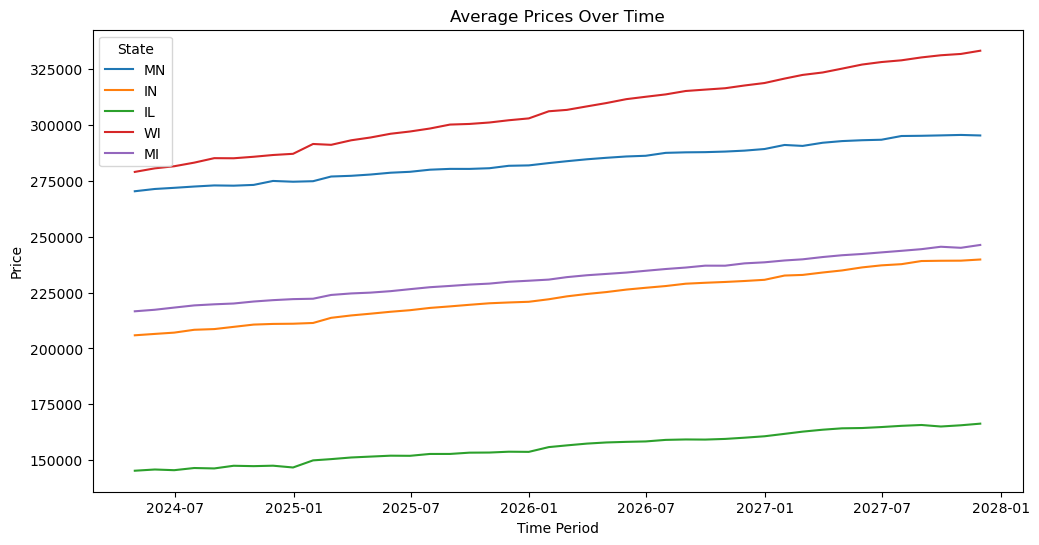

In [56]:
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=predicted_df, x='Date', y='PredictedValue', hue='StateName')

plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Average Prices Over Time')
plt.legend(title='State')
plt.show()

In [57]:
#Now let's look at the overall data, including the predictions

In [58]:
#First we'll reformate predicted_df for ease of concatenating with avg_df
predicted_df = predicted_df.pivot(index='Date', columns='StateName', values='PredictedValue')
predicted_df.columns.name = None
predicted_df.reset_index(inplace=True)

In [59]:
avg_df.rename(columns={'Time Period': 'Date'}, inplace=True)
predicted_df.head()

,Date,IL,IN,MI,MN,WI
0,2024-04-30,145285.295299,205896.743750,216636.935440,270364.114604,279021.734537
1,2024-05-31,145832.327046,206514.774046,217327.199823,271382.344417,280613.006182
2,2024-06-30,145524.381718,207091.068654,218303.029696,271895.902209,281552.364162
3,2024-07-31,146496.355091,208363.882217,219276.098744,272477.555088,283167.861798
4,2024-08-31,146307.022703,208677.281854,219767.130219,272971.065006,285173.653174


In [60]:
#Here we take a few steps to avoid irritating timestamps from showing up on the newly concatenated rows of total_df from predicted_df
avg_df['Date'] = pd.to_datetime(avg_df['Date'])
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])
avg_df['Date'] = avg_df['Date'].dt.date
predicted_df['Date'] = predicted_df['Date'].dt.date
total_df = pd.concat([avg_df, predicted_df], ignore_index=True)
print(total_df.tail())

           Date             IL             IN             MI             MN  \
330  2027-07-31  165376.881753  237728.690624  243703.137279  295088.770916   
331  2027-08-31  165753.281860  239135.129273  244445.065622  295185.682483   
332  2027-09-30  165075.132024  239254.105099  245523.108185  295362.650077   
333  2027-10-31  165623.065444  239297.354462  245055.597512  295566.009842   
334  2027-11-30  166351.169497  239815.839336  246325.662345  295329.901544   

                WI  
330  328967.335236  
331  330263.491680  
332  331225.237064  
333  331816.172354  
334  333257.271834  


In [61]:
# We now visualize the concatenated dataframe

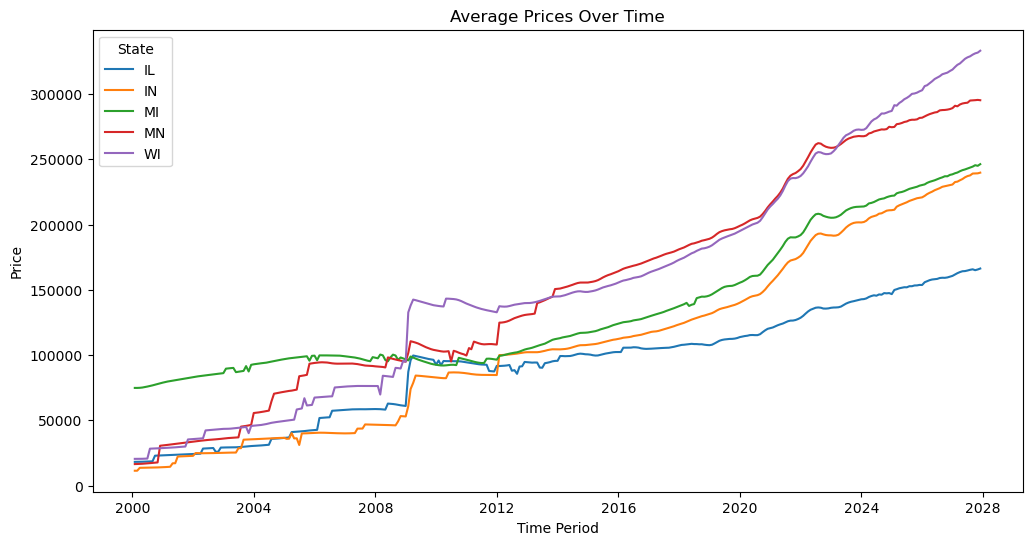

In [62]:
#we melt the dataframe for ease of plotting
melted_df = total_df.melt(id_vars='Date', var_name='State', value_name='Price')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Date', y='Price', hue='State')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Average Prices Over Time')
plt.legend(title='State')
plt.show()

In [63]:
# Our analysis has forecasted, surprisingly, that among the five states we've investigated, Illinois is both currently and forecasted 
# through 2027 to have the lowest average housing price, with Indiana forecasted to be the second lowest, Michigan in the middle
# and Minnesota and Wisconsin very vlose at the top of the price range. While we've identified that Chicago has no listings in the
# data we investigated, there is only one 'metro' listing per state, so we can't conclude that there is a bias introduced by more expensive
# city listings in other states. Further, Minnesota and Wisconsin have fewer metro areas than Illinois and Indiana in total, and so if anything
# we likely could reasonably have expected those other, denser population areas to drive values up in those two states higher than MN and WI.
# Therefore, if all other considerations are equal, my fiancee and I can expect to encounter the most reasonable housing prices in Illinois, and
# the most expensive in Minnesota and Wisconsin when it comes time for us to look at purchasing a home.